# EDA

**Imports**

In [127]:
import pandas as pd
import numpy as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import sys
sys.path.append("./util_")
import prepare_

from tqdm.auto import tqdm, trange

**get and split data**

In [128]:
# get data
zillow = prepare_.wrangle_zillow()
zillow.head()

In [123]:
# split data
train, validate, test = prepare_.split_data_(df=zillow,
                                            test_size=0.2,
                                             random_state=95)
(train.shape, validate.shape, test.shape)

((1278128, 7), (426043, 7), (426043, 7))

## Univariate statistics

In [124]:
# Discdescribetive statistics
train.describe()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,tax_amount,county
count,1.278128e+06,1.278128e+06,1.278128e+06,1.278128e+06,1.278128e+06,1.278128e+06,1.278128e+06
mean,3.302256e+00,2.242023e+00,1.864557e+03,4.612028e+05,1.960946e+03,5.624424e+03,6.048247e+03
std,9.329020e-01,9.932065e-01,1.078813e+03,6.814575e+05,2.214614e+01,7.875704e+03,2.030105e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.896350e+05,1.949000e+03,2.547540e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.624000e+03,3.284230e+05,1.958000e+03,4.113780e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.211000e+03,5.350000e+05,1.976000e+03,6.415480e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,5.311180e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


In [125]:
# look at the number of unique categories
train.nunique()

bedrooms          18
bathrooms         38
sqr_feet        9513
tax_value     446620
year_built       148
tax_amount    707608
county             3
dtype: int64

In [24]:
# find only columns with low count of categories
low_category_cols = train.nunique()[train.nunique() < 1000].index
low_category_cols

Index(['bedrooms', 'bathrooms', 'year_built', 'county'], dtype='object')

In [102]:
def plot_categorical_and_continuous_vars():
    # plot all the low category columns to see the distributions
    for col in low_category_cols:
        print(col.upper())
        print("count of unique:",train[col].nunique())
        print(train[col].value_counts().sort_values(), train[col].value_counts(normalize=True).sort_values())

        # plot
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
        sns.countplot(data= train, x=col, ax=ax[0])
        sns.boxplot(data= train, x=col, ax=ax[1])
        sns.violinplot(data= train, x=col, ax=ax[2])
        plt.tight_layout()

        # Specify the path to the directory where you want to save the figure
        directory_path = './project_viz/01_univariate_viz/'

        # Create the full file path by combining the directory path and the desired file name
        file_path = os.path.join(directory_path, f'{col}.png')

        # Save the figure to the specified file path
        fig.canvas.print_figure(file_path)

        plt.show()

BEDROOMS
count of unique: 18
16         1
18         1
25         1
15         5
12         7
13         9
11        18
10        78
9        180
8        663
0       2603
7       2859
1      13568
6      15070
5      90252
2     199593
4     378362
3     574858
Name: bedrooms, dtype: int64 16    7.823943e-07
18    7.823943e-07
25    7.823943e-07
15    3.911971e-06
12    5.476760e-06
13    7.041548e-06
11    1.408310e-05
10    6.102675e-05
9     1.408310e-04
8     5.187274e-04
0     2.036572e-03
7     2.236865e-03
1     1.061553e-02
6     1.179068e-02
5     7.061265e-02
2     1.561604e-01
4     2.960283e-01
3     4.497656e-01
Name: bedrooms, dtype: float64


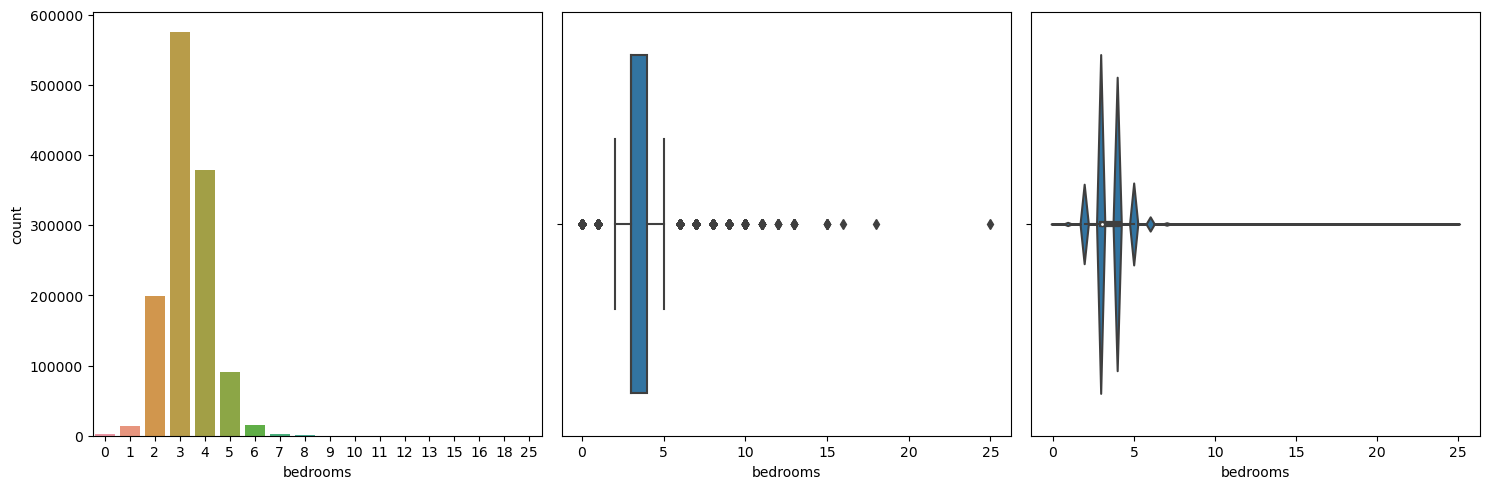

BATHROOMS
count of unique: 38
14.50         1
19.00         1
19.50         1
32.00         1
1.75          2
12.50         2
17.00         2
11.50         2
18.00         2
20.00         5
16.00         8
10.50         8
0.50         11
15.00        13
14.00        17
13.00        29
9.50         36
12.00        47
8.50         67
11.00        93
10.00       202
7.50        223
9.00        422
6.50        773
8.00        987
0.00       2558
7.00       2671
5.50       3778
6.00       6395
4.50      11702
5.00      16974
3.50      16991
1.50      18238
4.00      49207
2.50      84742
1.00     246578
3.00     253210
2.00     562129
Name: bathrooms, dtype: int64 14.50    7.823943e-07
19.00    7.823943e-07
19.50    7.823943e-07
32.00    7.823943e-07
1.75     1.564789e-06
12.50    1.564789e-06
17.00    1.564789e-06
11.50    1.564789e-06
18.00    1.564789e-06
20.00    3.911971e-06
16.00    6.259154e-06
10.50    6.259154e-06
0.50     8.606337e-06
15.00    1.017113e-05
14.00    1.330070e-05
13

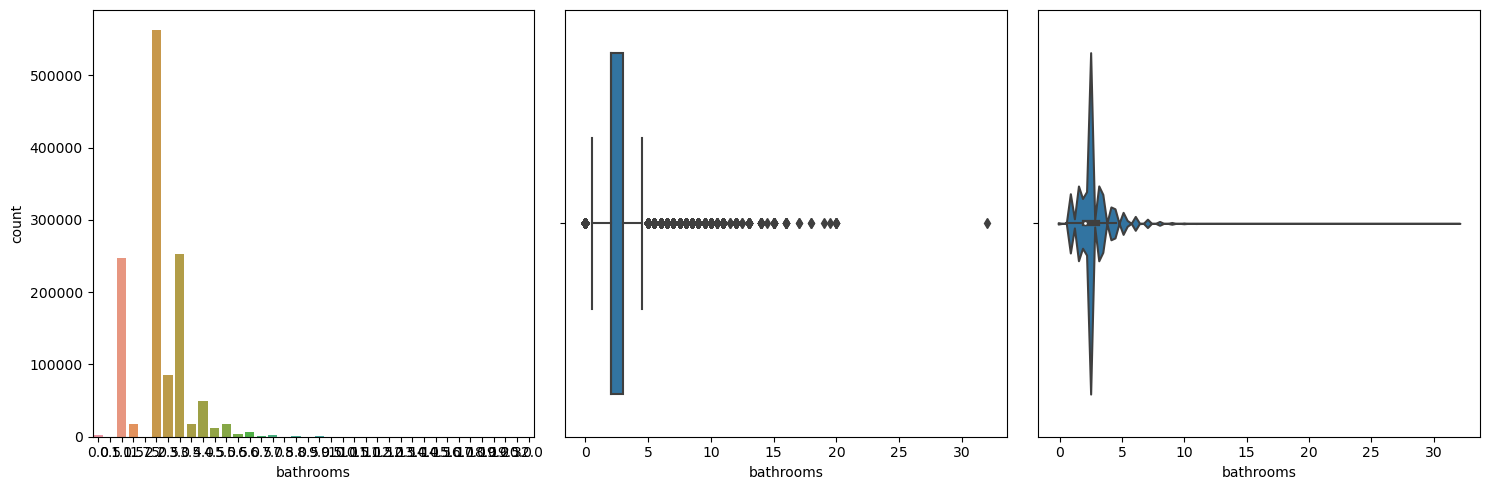

YEAR_BUILT
count of unique: 148
1881        1
1878        1
1874        1
1833        1
1862        1
        ...  
1956    36957
1953    37223
1954    41350
1950    42864
1955    50183
Name: year_built, Length: 148, dtype: int64 1881    7.823943e-07
1878    7.823943e-07
1874    7.823943e-07
1833    7.823943e-07
1862    7.823943e-07
            ...     
1956    2.891494e-02
1953    2.912306e-02
1954    3.235200e-02
1950    3.353655e-02
1955    3.926289e-02
Name: year_built, Length: 148, dtype: float64


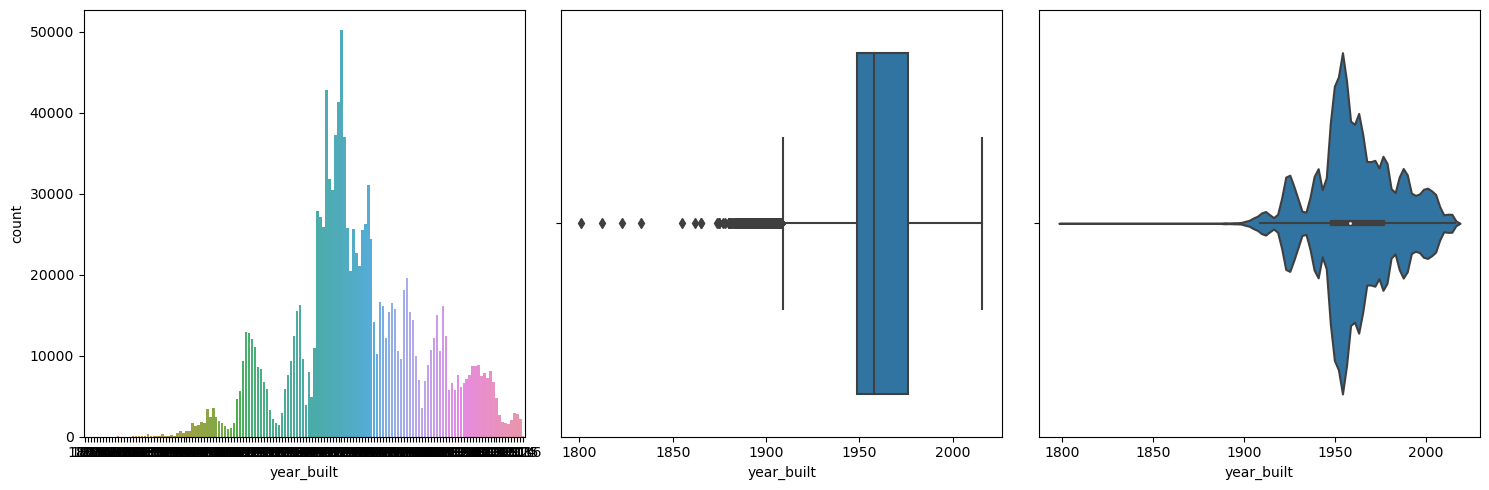

COUNTY
count of unique: 3
6111.0     96721
6059.0    328085
6037.0    853322
Name: county, dtype: int64 6111.0    0.075674
6059.0    0.256692
6037.0    0.667634
Name: county, dtype: float64


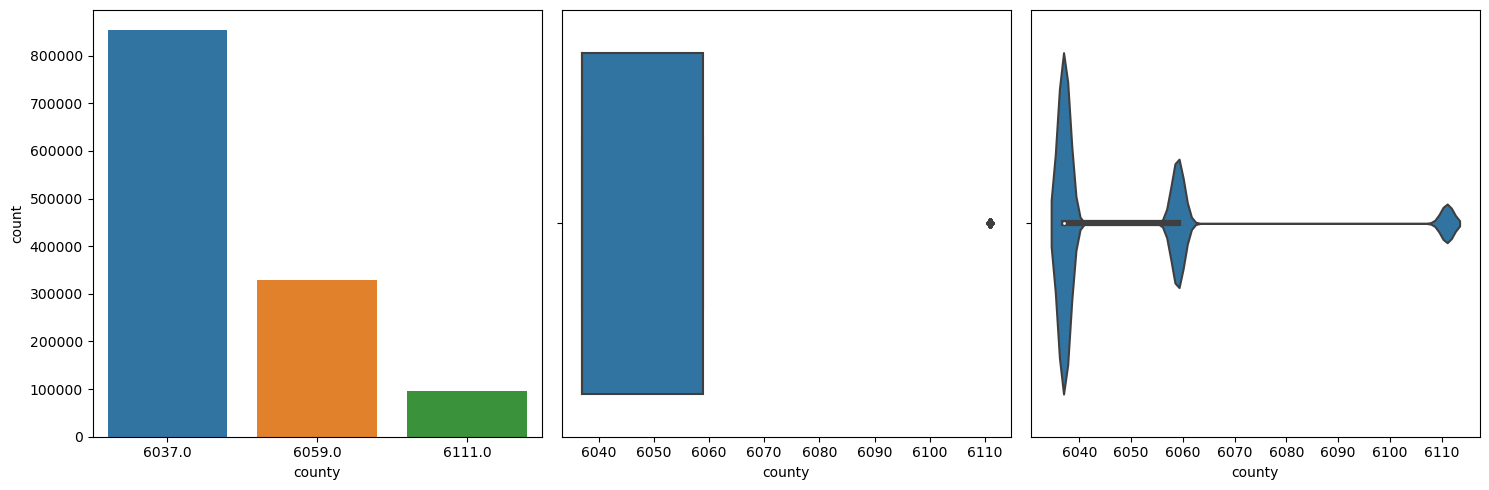

In [103]:
plot_categorical_and_continuous_vars()

**Remove outliers**

In [38]:
    # remove outliers
    zillow = zillow[zillow.bedrooms > 10]
    zillow = zillow[zillow.bathrooms > 10]

**Take aways**
- bedrooms and bathrooms have values That I consider outliers so I will remove them from my data. And property that has more than 10 bedrooms aor bath rooms is removed.


## Bivariate statistics

In [99]:
# # pairs of comninmations
# combinarions = list(itertools.product(low_category_cols, ["tax_value"]))
# combinarions

[('bedrooms', 'tax_value'),
 ('bathrooms', 'tax_value'),
 ('year_built', 'tax_value'),
 ('county', 'tax_value')]

BEDROOMS VS TAX_VALUE


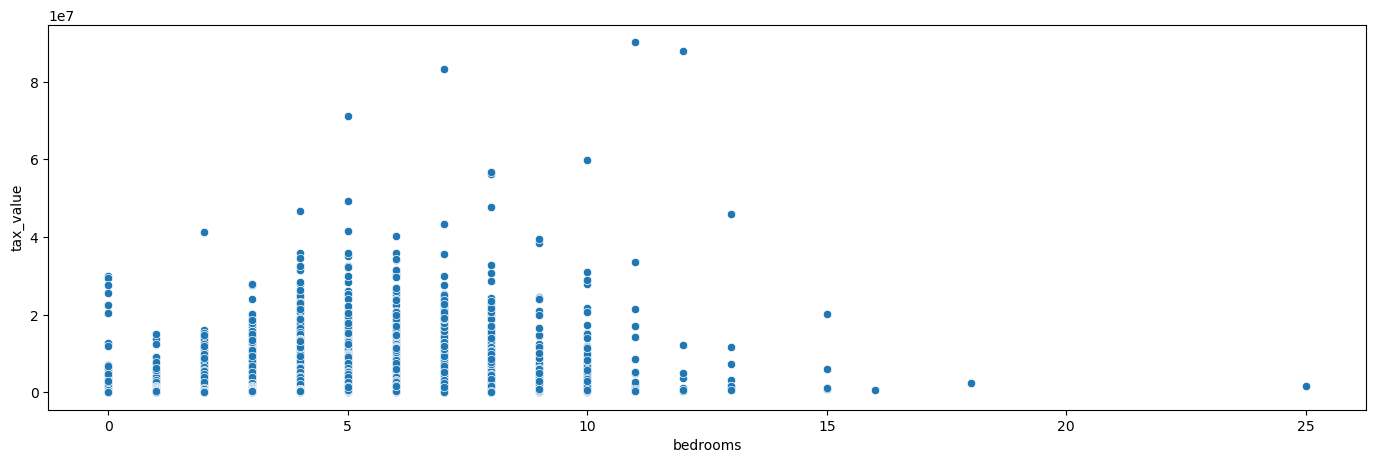

BATHROOMS VS TAX_VALUE


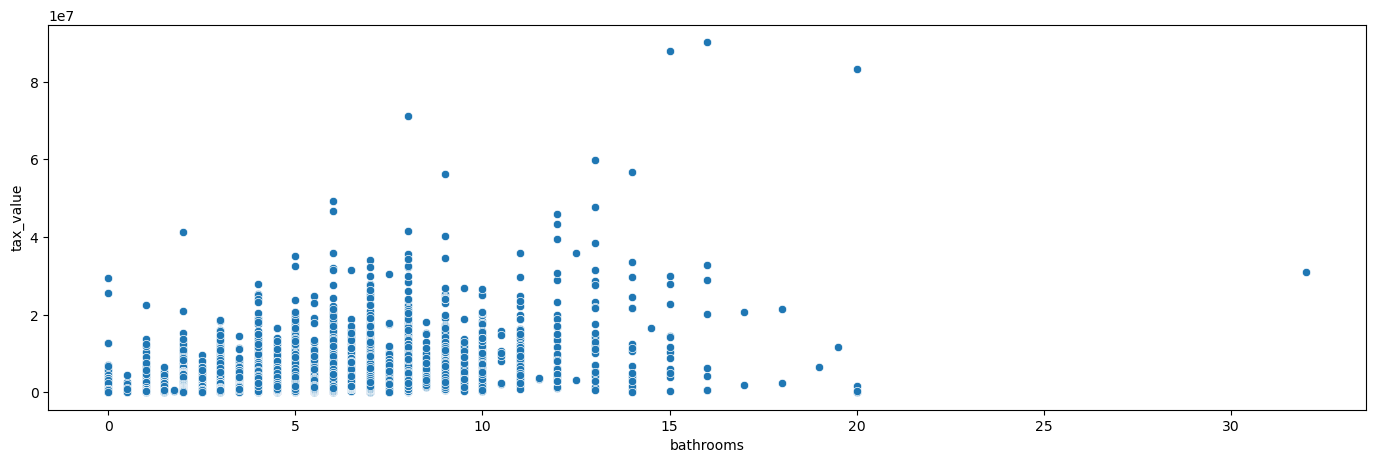

SQR_FEET VS TAX_VALUE


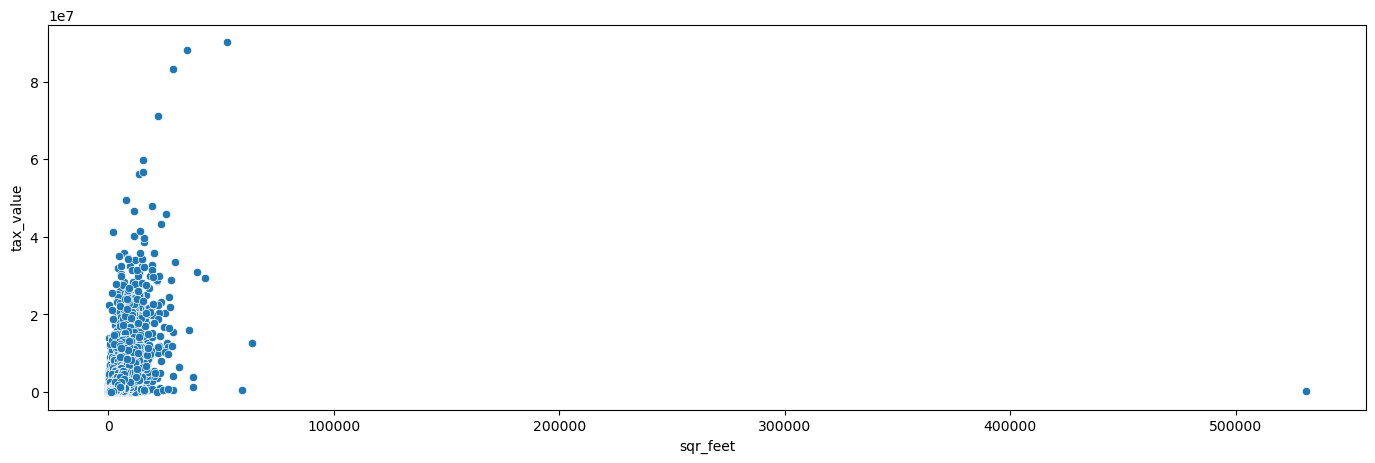

TAX_VALUE VS TAX_VALUE


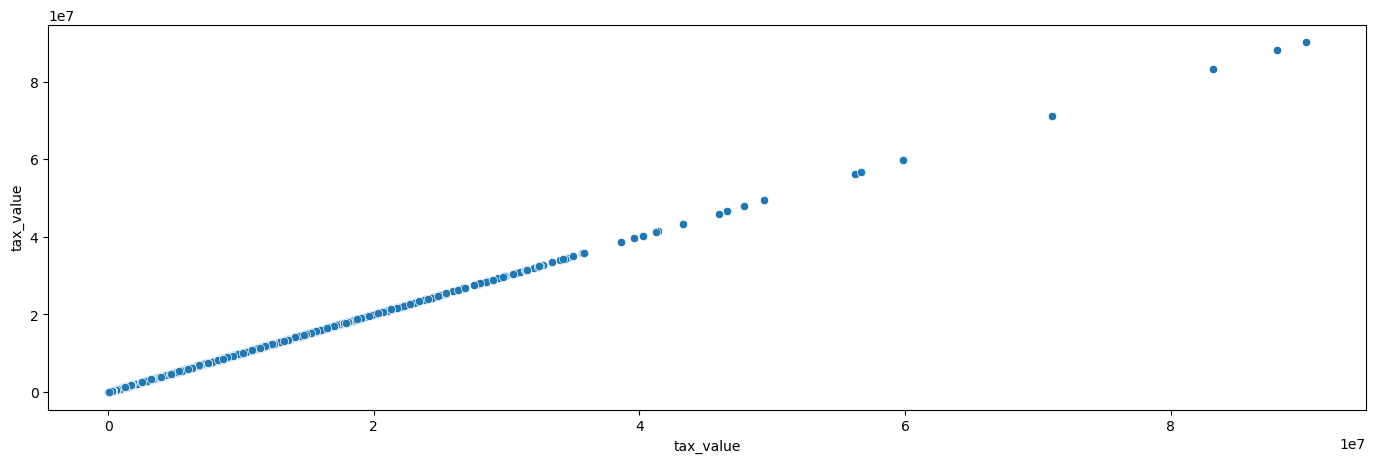

YEAR_BUILT VS TAX_VALUE


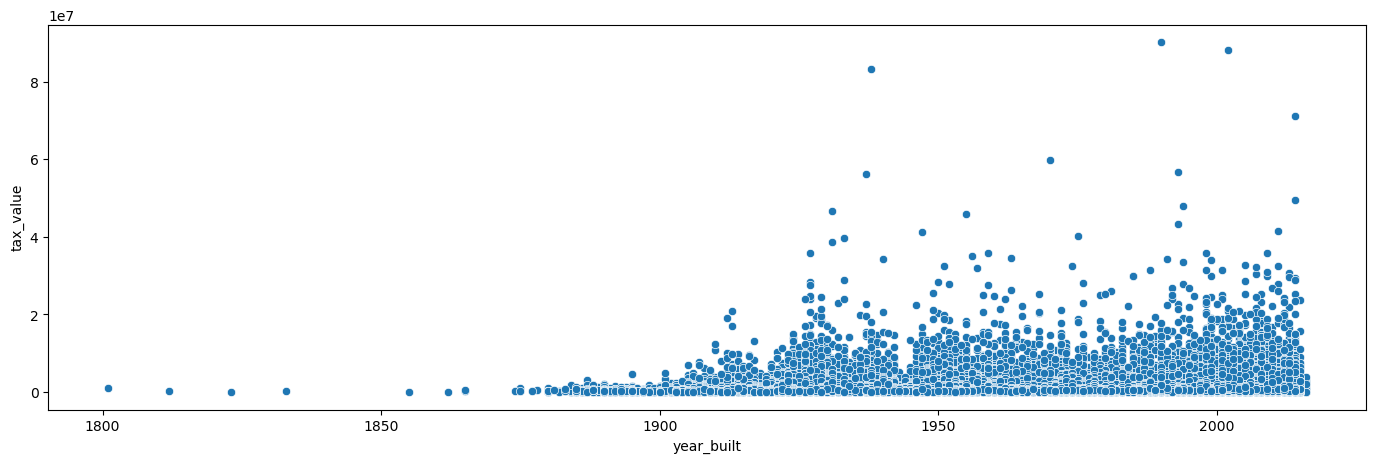

TAX_AMOUNT VS TAX_VALUE


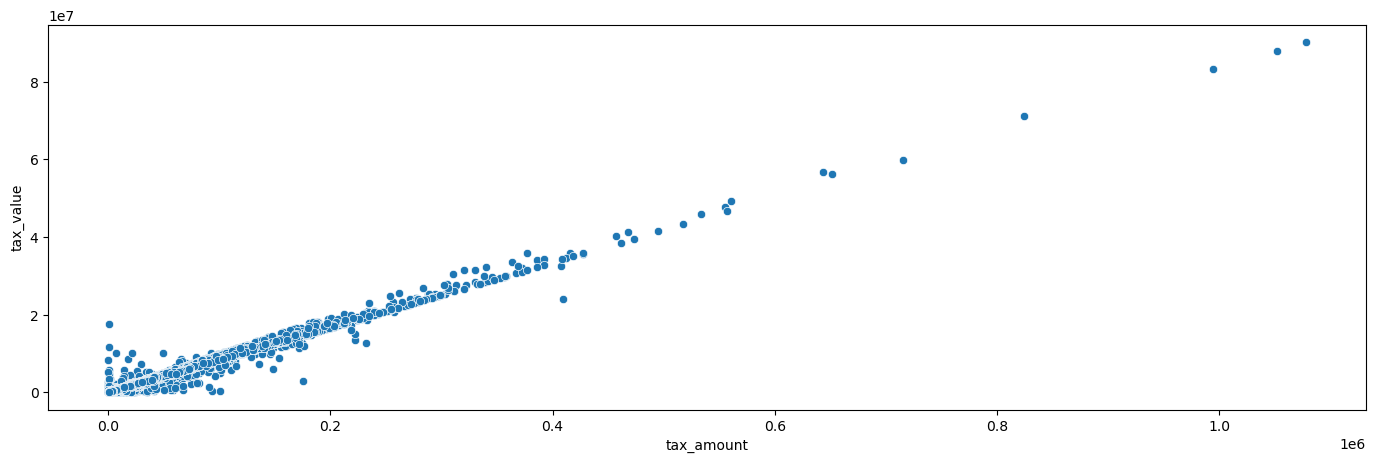

COUNTY VS TAX_VALUE


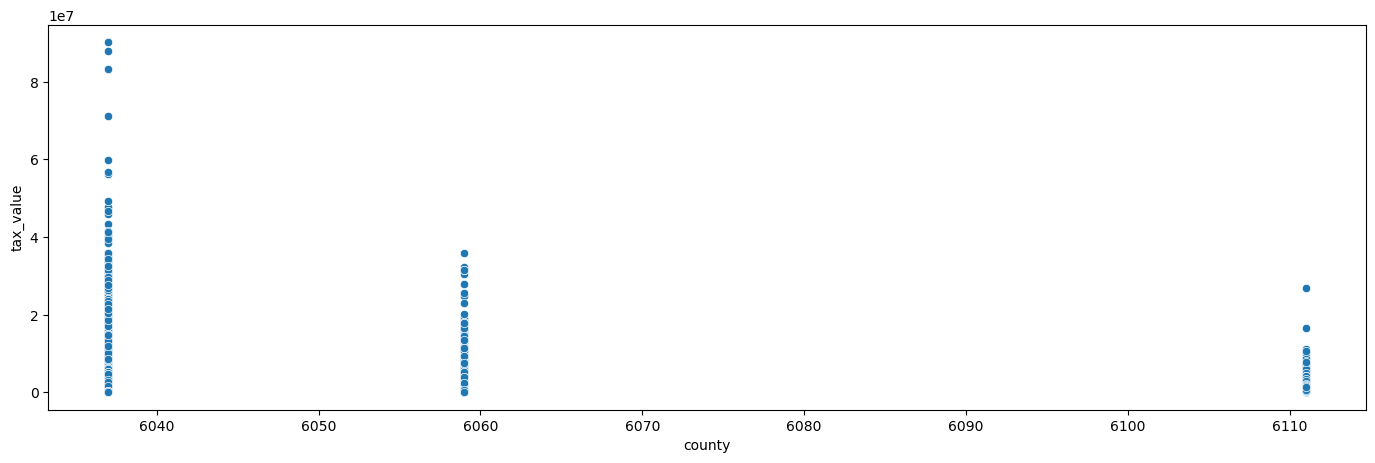

In [120]:
# plot all the low category columns to see the distributions
for col in train.columns:
    print(col.upper(), "VS", "tax_value".upper())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17,5))
    sns.scatterplot(data= train, x=col , y="tax_value",, ax= ax)
    
    # Specify the path to the directory where you want to save the figure
    directory_path = './project_viz/02_bivariate_viz/'

    # Create the full file path by combining the directory path and the desired file name
    file_path = os.path.join(directory_path, f'{col}.png')
    
    # Save the figure to the specified file path
    fig.canvas.print_figure(file_path)
    
    plt.show()
    plt.show()

- how strong is the relationship between these variables?
- how impactful is the first county to the target
- what's the relationship between sqr_feet and county

## Multivariate statistics

In [114]:
def plot_variable_pairs(train):
    sns.pairplot(train,  corner=True)

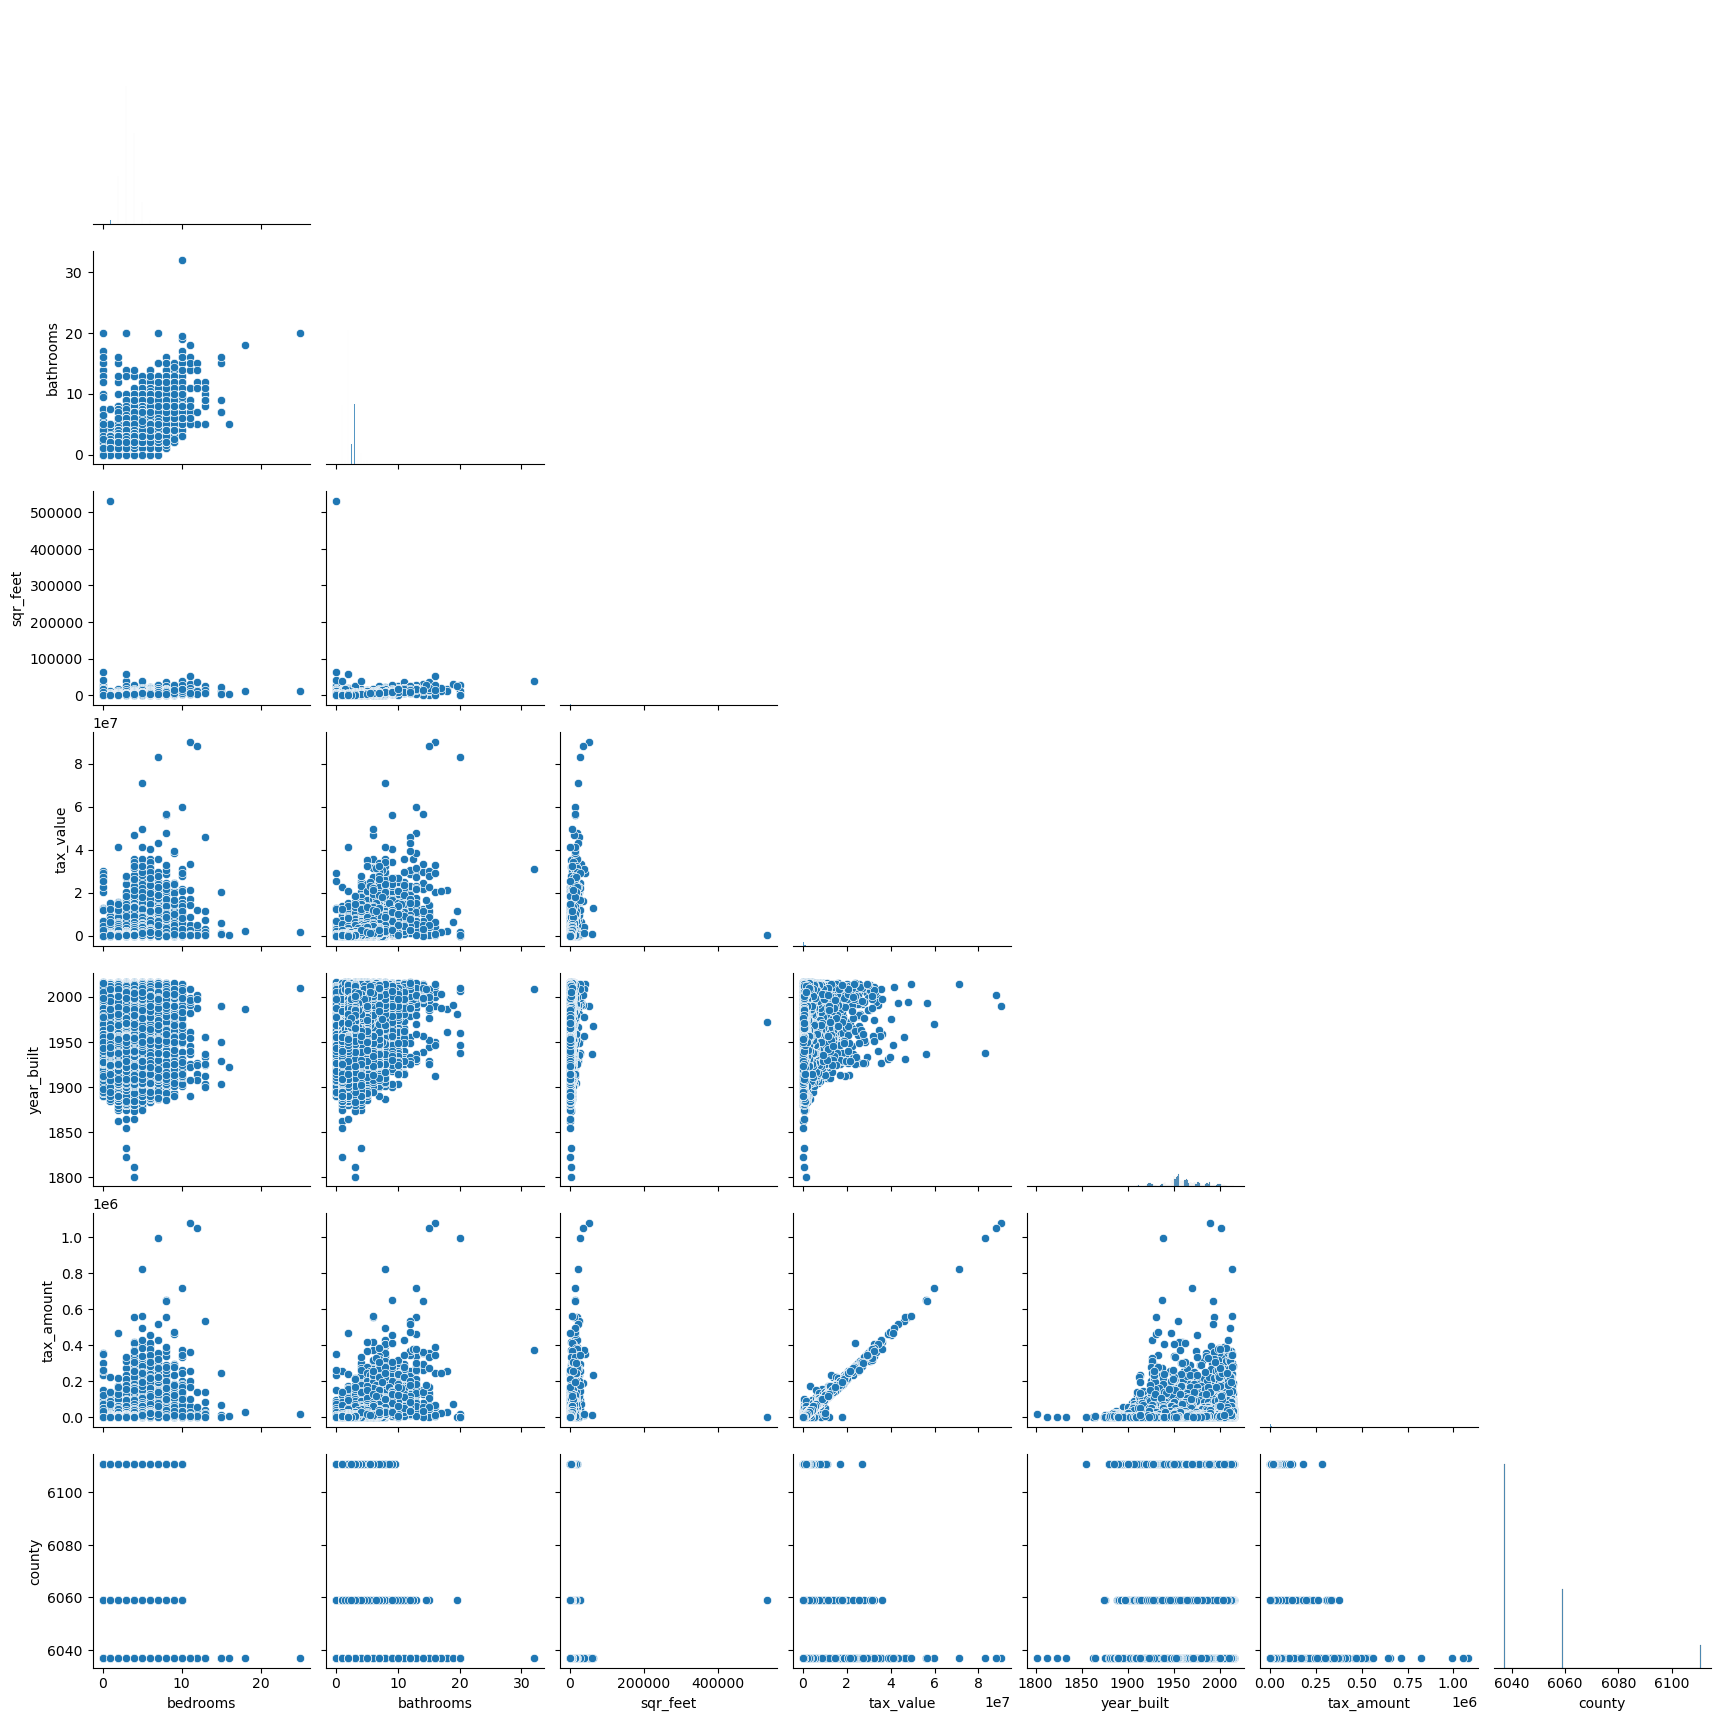

In [115]:
plot_variable_pairs(train)

In [ ]:
from tqdm.auto import tqdm, trange
from IPython.display import display
import time

pbar = tqdm(total=1)
display(pbar)

# Simulate some computation in the cell
for _ in trange(len(train)):
    time.sleep(1)
    pbar.update(0.01)
